## Análisis exploratorio de los datos disponibles sobre *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df = pd.read_csv('Data/listings.csv.gz',compression = 'gzip',low_memory=False)

In [3]:
#vemos la estructura de los datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19910 entries, 0 to 19909
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.1+ MB


In [4]:
#Todas las columnas están en minúsculas y no hay espacios
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190113034220,2019-01-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.09
1,20168,https://www.airbnb.com/rooms/20168,20190113034220,2019-01-13,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,2.22
2,25428,https://www.airbnb.com/rooms/25428,20190113034220,2019-01-13,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.08
3,27886,https://www.airbnb.com/rooms/27886,20190113034220,2019-01-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.05
4,28658,https://www.airbnb.com/rooms/28658,20190113034220,2019-01-13,Cosy guest room near city centre -1,2 beds guest room in Amsterdam West near Erasm...,Cosy small but comfortable guest room with twi...,2 beds guest room in Amsterdam West near Erasm...,none,"The listing is located in Amsterdam west, betw...",...,f,f,moderate,t,t,2,0,2,0,4.15


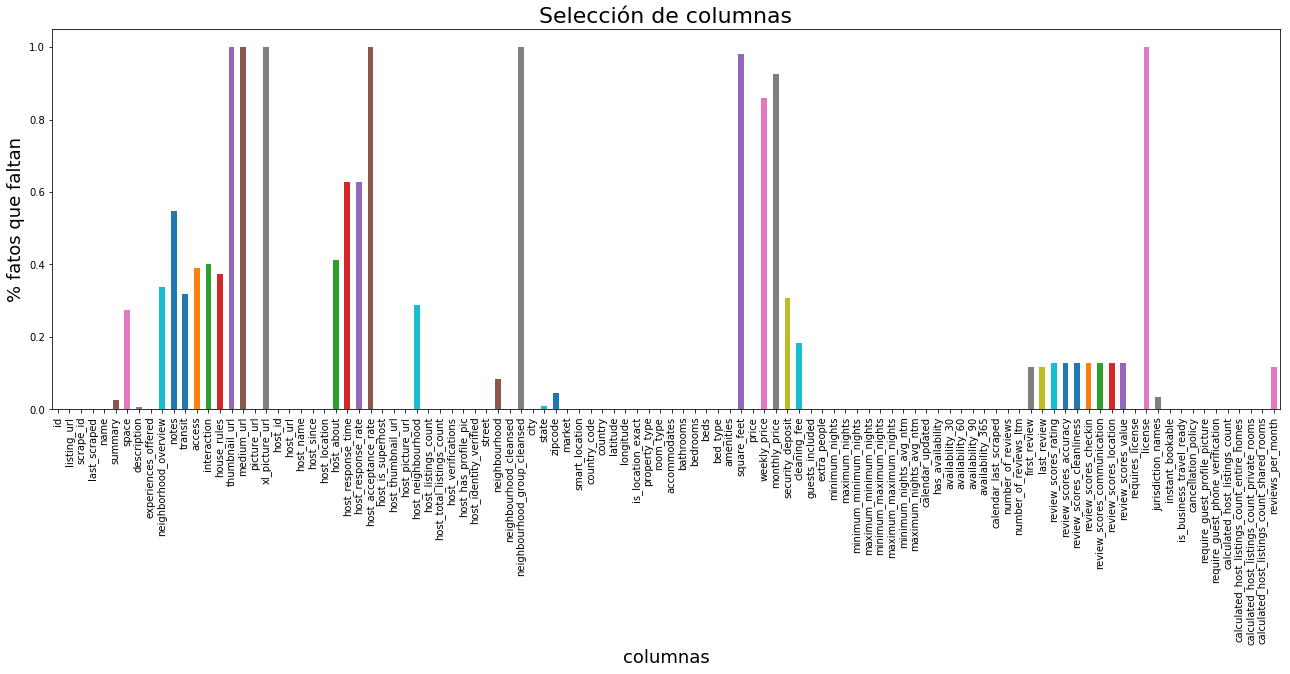

In [5]:
#por tanto debemos realizar una selección de las columnas que aportan valor al análisis
missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [6]:
#El primer criterio elegido para reducir el número de columnas es que contenga muchos nulos
missing[missing > 0.3]



neighborhood_overview           0.337770
notes                           0.547966
transit                         0.318734
access                          0.390758
interaction                     0.401758
house_rules                     0.372727
thumbnail_url                   1.000000
medium_url                      1.000000
xl_picture_url                  1.000000
host_about                      0.411401
host_response_time              0.628076
host_response_rate              0.628076
host_acceptance_rate            1.000000
neighbourhood_group_cleansed    1.000000
square_feet                     0.979910
weekly_price                    0.859970
monthly_price                   0.924259
security_deposit                0.306730
license                         0.999849
dtype: float64

In [7]:
a_borrar = ['thumbnail_url','medium_url','xl_picture_url','host_acceptance_rate','neighbourhood_group_cleansed'
           ,'square_feet','weekly_price','monthly_price','license','notes','host_response_rate','host_response_time'
           ,'host_about','interaction','neighborhood_overview','transit','access','house_rules','security_deposit']

In [8]:
df.drop(a_borrar,axis=1,inplace=True)


In [9]:
#Hemos pasado de 106 columnas a 87
df.shape

(19910, 87)

In [10]:
#desglosamos las columnas por tipo
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19910 entries, 0 to 19909
Data columns (total 87 columns):
id                                              19910 non-null int64
listing_url                                     19910 non-null object
scrape_id                                       19910 non-null int64
last_scraped                                    19910 non-null object
name                                            19872 non-null object
summary                                         19402 non-null object
space                                           14462 non-null object
description                                     19781 non-null object
experiences_offered                             19910 non-null object
picture_url                                     19910 non-null object
host_id                                         19910 non-null int64
host_url                                        19910 non-null object
host_name                                       19907 

In [11]:
#Separamos las columnas por el tipo en el que vienen dados, valoramos su utilidad y comprobamos que sea correcto
integers = df.columns[df.dtypes == 'int64']
df[integers].head()

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2818,20190113034220,3159,2,1,3,15,3,3,15,...,18,18,18,18,249,31,1,0,1,0
1,20168,20190113034220,59484,2,2,1,1000,1,4,1000,...,2,14,35,184,240,49,2,1,1,0
2,25428,20190113034220,56142,3,2,14,60,14,14,60,...,27,31,31,155,1,1,2,2,0,0
3,27886,20190113034220,97647,2,1,2,730,2,2,730,...,16,35,52,164,175,48,1,0,1,0
4,28658,20190113034220,123414,2,2,3,15,3,3,15,...,12,30,39,265,438,60,2,0,2,0


In [12]:
df[integers]['number_of_reviews'].value_counts()

0      2319
1      1405
2      1212
3      1093
4       934
5       846
6       765
7       717
8       627
9       594
10      559
11      487
12      445
14      409
13      392
15      355
16      342
19      299
17      296
18      271
20      243
23      231
21      211
22      211
24      196
25      196
26      169
27      168
29      142
28      140
       ... 
308       1
180       1
643       1
547       1
483       1
451       1
419       1
403       1
229       1
293       1
265       1
405       1
233       1
217       1
201       1
616       1
360       1
296       1
264       1
200       1
399       1
199       1
582       1
438       1
246       1
230       1
182       1
533       1
485       1
279       1
Name: number_of_reviews, Length: 357, dtype: int64

In [13]:
categoricas = df.columns[df.dtypes == 'object']
df[categoricas].head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,picture_url,host_url,host_name,...,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/2818,2019-01-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,https://a0.muscache.com/im/pictures/10272854/8...,https://www.airbnb.com/users/show/3159,Daniel,...,2019-01-13,2009-03-30,2018-12-30,f,{Amsterdam},t,f,strict_14_with_grace_period,f,f
1,https://www.airbnb.com/rooms/20168,2019-01-13,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,https://a0.muscache.com/im/pictures/69979664/3...,https://www.airbnb.com/users/show/59484,Alexander,...,2019-01-13,2010-03-02,2019-01-08,f,{Amsterdam},f,f,strict_14_with_grace_period,f,f
2,https://www.airbnb.com/rooms/25428,2019-01-13,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,https://a0.muscache.com/im/pictures/138431/707...,https://www.airbnb.com/users/show/56142,Joan,...,2019-01-13,2018-01-21,2018-01-21,f,{Amsterdam},f,f,strict_14_with_grace_period,f,f
3,https://www.airbnb.com/rooms/27886,2019-01-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,https://a0.muscache.com/im/pictures/02c2da9d-6...,https://www.airbnb.com/users/show/97647,Flip,...,2019-01-13,2012-01-09,2018-12-30,f,{Amsterdam},t,f,strict_14_with_grace_period,f,f
4,https://www.airbnb.com/rooms/28658,2019-01-13,Cosy guest room near city centre -1,2 beds guest room in Amsterdam West near Erasm...,Cosy small but comfortable guest room with twi...,2 beds guest room in Amsterdam West near Erasm...,none,https://a0.muscache.com/im/pictures/694776/7ac...,https://www.airbnb.com/users/show/123414,Michele,...,2019-01-13,2010-05-16,2018-12-26,f,{Amsterdam},f,f,moderate,t,t


In [14]:
#Borramos las categóricas que no son relevantes
df[categoricas].experiences_offered.value_counts()

none    19910
Name: experiences_offered, dtype: int64

In [15]:
a_borrar_3 = ['listing_url','experiences_offered','picture_url','host_url','cancellation_policy'
             ,'require_guest_profile_picture','require_guest_phone_verification']

In [16]:
floats = df.columns[df.dtypes == 'float64']
df[floats].head()

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,1.0,52.365755,4.941419,1.5,1.0,2.0,3.0,15.0,97.0,10.0,10.0,10.0,10.0,9.0,10.0,2.09
1,2.0,2.0,52.365087,4.893541,1.0,1.0,1.0,3.1,1000.0,87.0,9.0,10.0,9.0,9.0,10.0,9.0,2.22
2,2.0,2.0,52.373114,4.883668,1.0,1.0,1.0,14.0,60.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.08
3,1.0,1.0,52.386727,4.892078,1.0,1.0,1.0,2.0,730.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.05
4,2.0,2.0,52.375342,4.857289,1.0,1.0,2.0,3.0,15.0,93.0,10.0,10.0,10.0,10.0,9.0,9.0,4.15


In [17]:
df[floats].beds.value_counts()

1.0     10827
2.0      5207
3.0      1805
4.0      1332
5.0       327
6.0       265
7.0        42
8.0        39
16.0       13
12.0       13
10.0       11
18.0        4
14.0        4
32.0        3
0.0         2
11.0        2
17.0        1
15.0        1
22.0        1
13.0        1
26.0        1
20.0        1
9.0         1
Name: beds, dtype: int64